In [237]:
#Import libraries need for cleaning and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
#Reading in the data and removing the last two columns
df = pd.read_csv('BankChurners.csv')
df = df.iloc[:,1:-2]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [239]:
#Seeing what kind of info/data types/ and if any nulls are present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [240]:
#Renaming the income column for easier reading 
df.Income_Category = df.Income_Category.map({'$60K - $80K':'60-80K', 'Less than $40K':'< 40K', '$80K - $120K':'80-120K', '$40K - $60K': '40-60K','$120K +':'120k>','Unknown':'Unknown'})

There seems to be "Unknown" values in the data frame. First we will see how many unknown values are present in the data frame and how we can deal with them.

In [241]:
#Checking to see what columns contain this 'Unknown value'
df[df =='Unknown'].count()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Having to remove roughly 1520 values from an already small dataset would make a more imbalanced dataset, so I will change the 'unknown' values to other known values randomly.

In [242]:
#Determining how many unknown values need to be changed for each column.
print(df.Education_Level.value_counts())
print(df.Marital_Status.value_counts())
print(df.Income_Category.value_counts())

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
< 40K      3561
40-60K     1790
80-120K    1535
60-80K     1402
Unknown    1112
120k>       727
Name: Income_Category, dtype: int64


In [244]:
#Using a list for each column and their values that we want to keep. 
EL = ['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate']
#Using a random seed to change each unknown value to anyone in the list above
np.random.seed(1) 
m = df['Education_Level'].eq('Unknown')
df.loc[m, 'Education_Level'] = np.random.choice(EL, size=m.sum())

MS = ['Married','Single','Divorced']
   
np.random.seed(1) 
m = df['Marital_Status'].eq('Unknown')
df.loc[m, 'Marital_Status'] = np.random.choice(MS, size=m.sum())

IC = ['< 40K','40-60K','60-80K','80-120K','120k>']
   
np.random.seed(1) 
m = df['Income_Category'].eq('Unknown')
df.loc[m, 'Income_Category'] = np.random.choice(IC, size=m.sum())

In [245]:
#Checkcing to see if the unknown values are no longer here 
print(df.Education_Level.unique())
print(df.Marital_Status.unique())
print(df.Income_Category.unique())

['High School' 'Graduate' 'Uneducated' 'Doctorate' 'College'
 'Post-Graduate']
['Married' 'Single' 'Divorced']
['60-80K' '< 40K' '80-120K' '40-60K' '120k>']


In [246]:
#Exporting the current dataframe to an excel file to use in Power BI
df.to_csv('BankChurning_Updated.csv',index=False)

# ETL and Visualization

Lets look at the difference between the categortical columns and numerical columns against the churned and existing customers

In [249]:
#Created a function in order to graph seperate bar graphs of the categorical columns
def Categortical_graphs(column_from_df):
    fig, axes = plt.subplots(1, 2,figsize=(16,5))
    temp = dfa[column_from_df].value_counts()
    df_1 = pd.DataFrame({'labels': temp.index,'values': temp.values})
    sns.barplot(ax=axes[0], x="labels",y="values",data=df_1)
    axes[0].set_title(f'{column_from_df} for Attrited Customers')
    axes[0].set_xlabel(column_from_df)
    axes[0].tick_params(labelrotation=90)
    axes[0].set_ylabel('Attrited Customers')
    temp_1 = dfe[column_from_df].value_counts()
    df_2 = pd.DataFrame({'labels': temp_1.index,'values': temp_1.values})
    sns.barplot(ax=axes[1], x="labels",y="values",data=df_2)
    axes[1].set_title(f'{column_from_df} for Existing Customers')
    axes[1].set_xlabel(column_from_df)
    axes[1].tick_params(labelrotation=90)
    axes[1].set_ylabel('Existing Customers')
    plt.show()

In [250]:
#Created a function in order to graph seperate histograms of the numerical columns
def Numerical_graphs(column_from_df):
    fig, axes = plt.subplots(1, 2,figsize=(16,5))
    sns.histplot(ax=axes[0],x=dfa[column_from_df],bins='auto',hue=dfa['Gender'])
    axes[0].set_title(f'{column_from_df} for Attrited Customers')
    axes[0].set_xlabel(column_from_df)
    axes[0].tick_params(labelrotation=90)
    axes[0].set_ylabel('Attrited Customers')
    sns.histplot(ax=axes[1],x=dfe[column_from_df],bins='auto',hue=dfe['Gender'])
    axes[1].set_title(f'{column_from_df} for Existing Customers')
    axes[1].set_xlabel(column_from_df)
    axes[1].tick_params(labelrotation=90)
    axes[1].set_ylabel('Existing Customers')
    plt.show()

In [253]:
#Seperated the data frames for each type of Churned Customer
dfe = df[df['Attrition_Flag'] == 'Existing Customer']
dfe = dfe.set_index('Attrition_Flag')
dfa = df[df['Attrition_Flag'] == 'Attrited Customer']
dfa = dfa.set_index('Attrition_Flag')

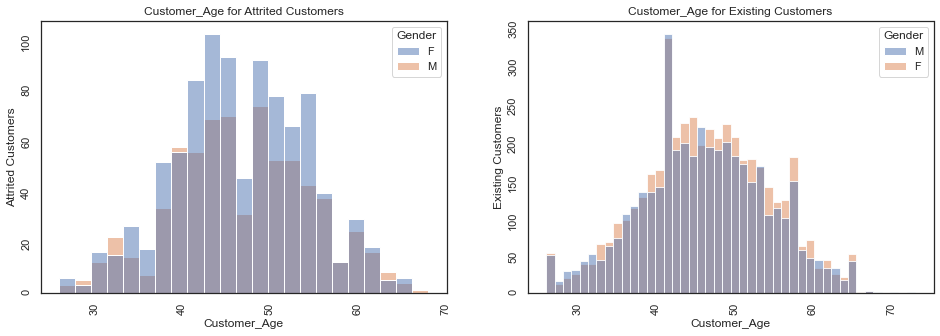

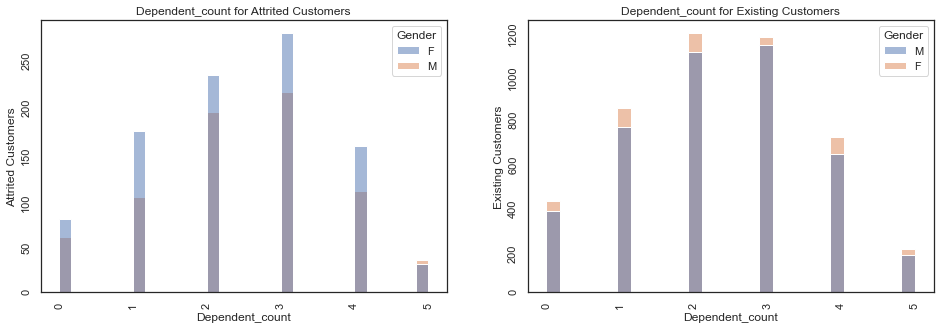

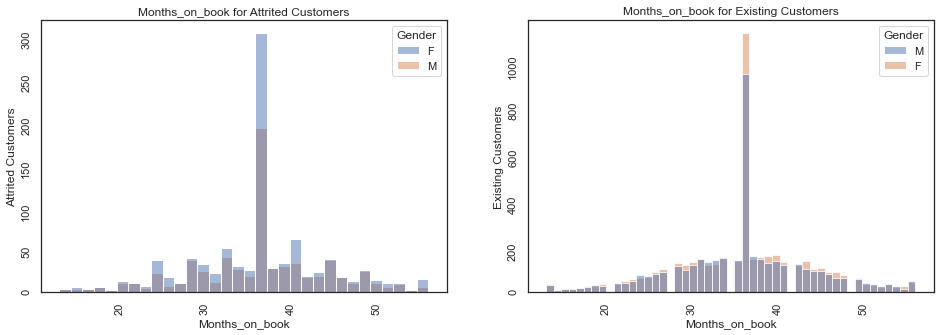

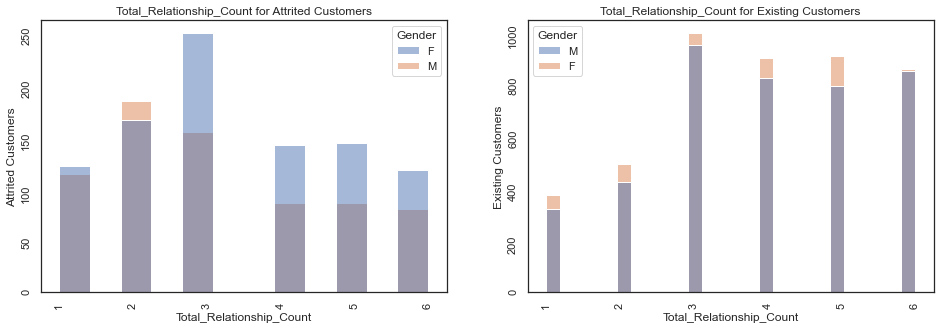

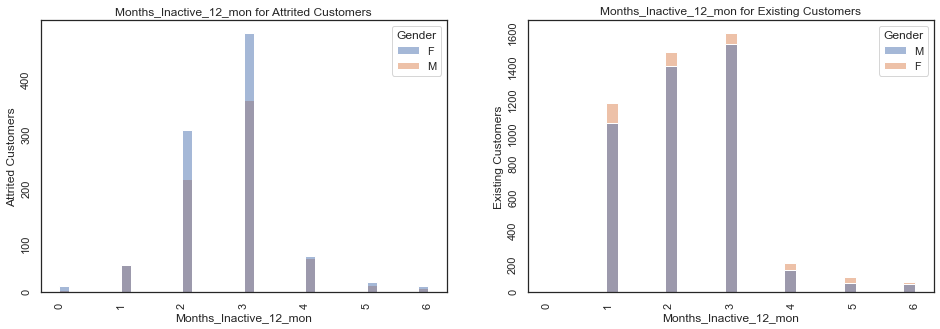

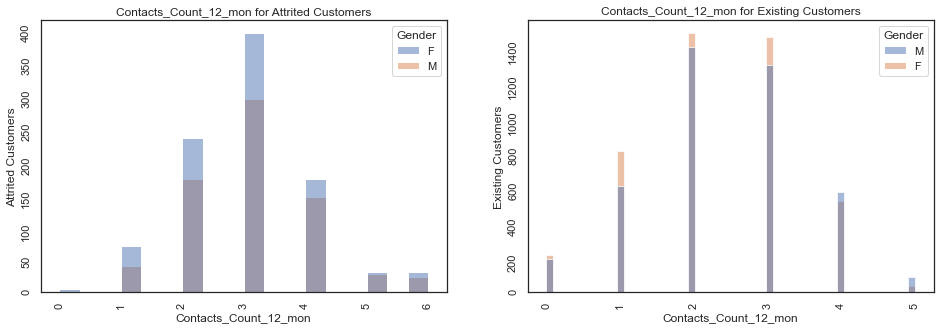

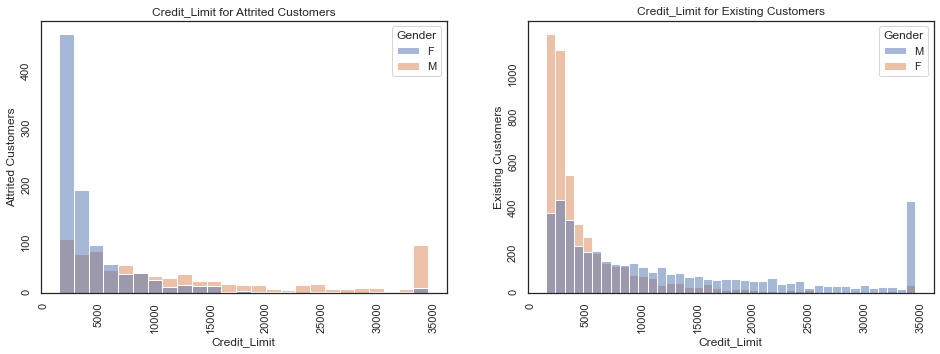

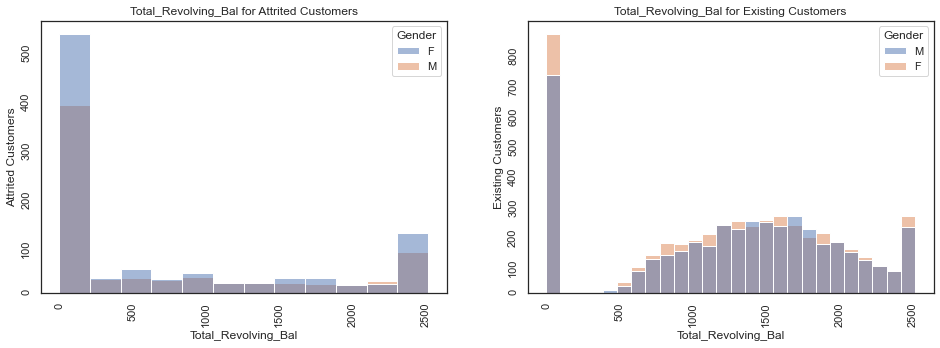

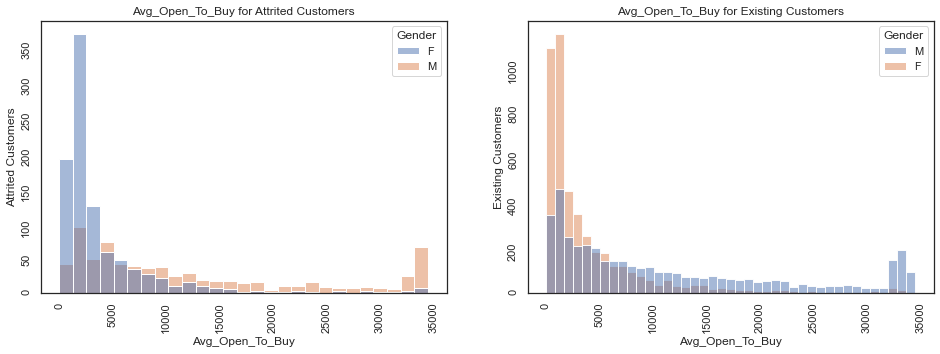

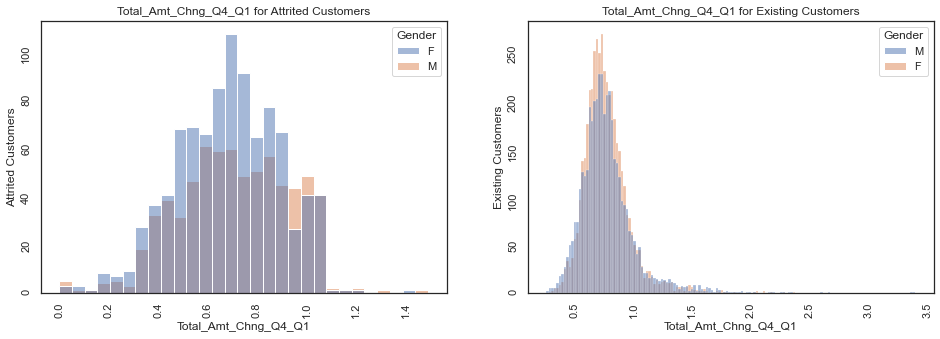

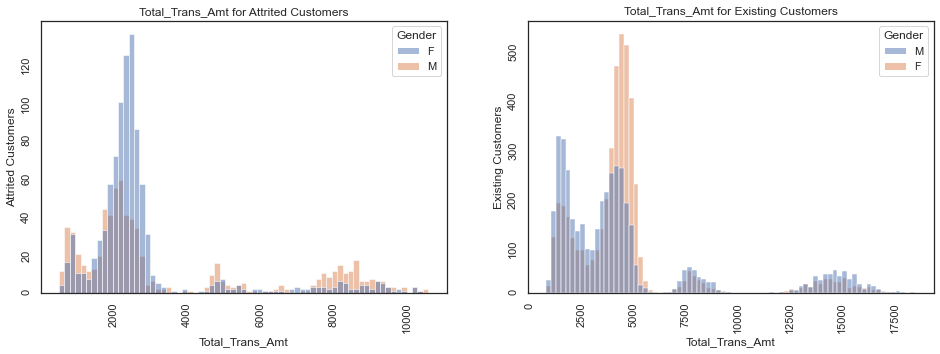

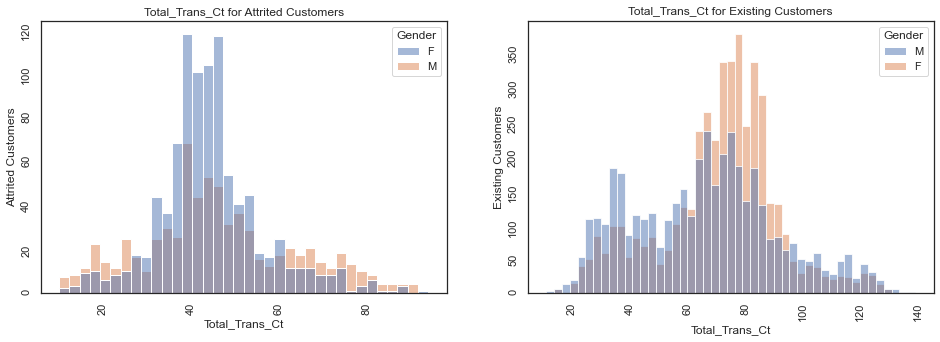

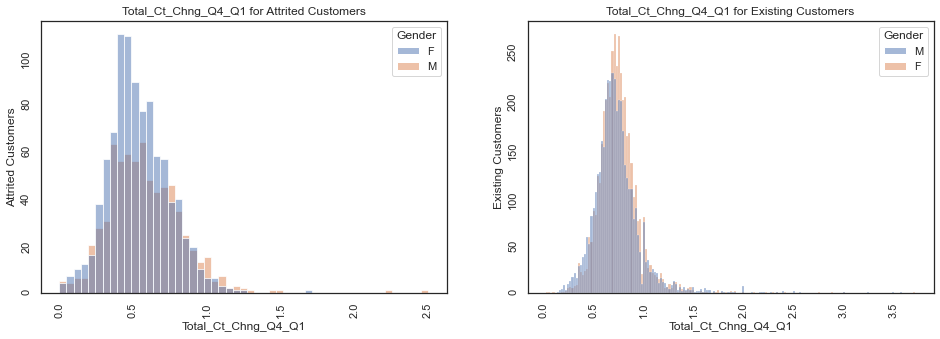

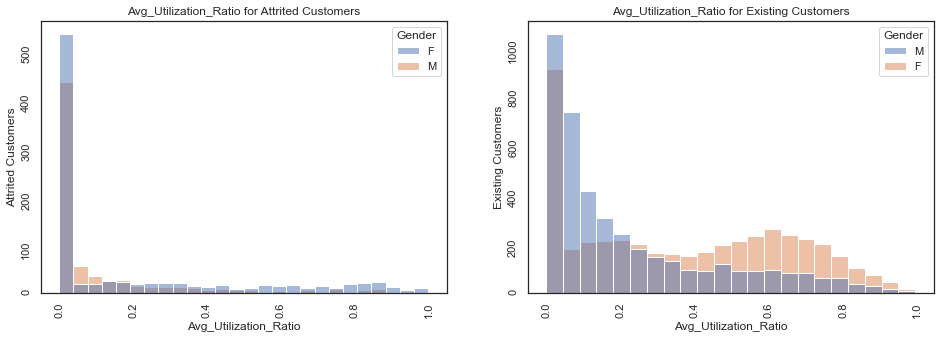

In [252]:
#Using a for loop to graph each numerical column
for col in df.columns:
    if df[col].dtype != 'object':
        Numerical_graphs(col)

In [254]:
#Setting the target variable to 1 and 0 
df.Attrition_Flag = df.Attrition_Flag.map({'Existing Customer':0,'Attrited Customer':1})

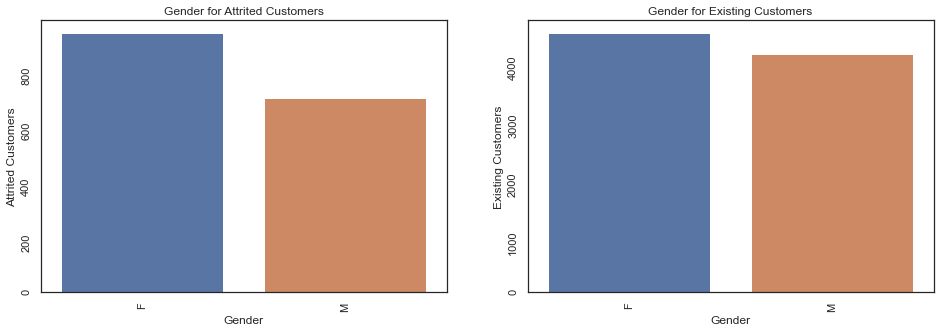

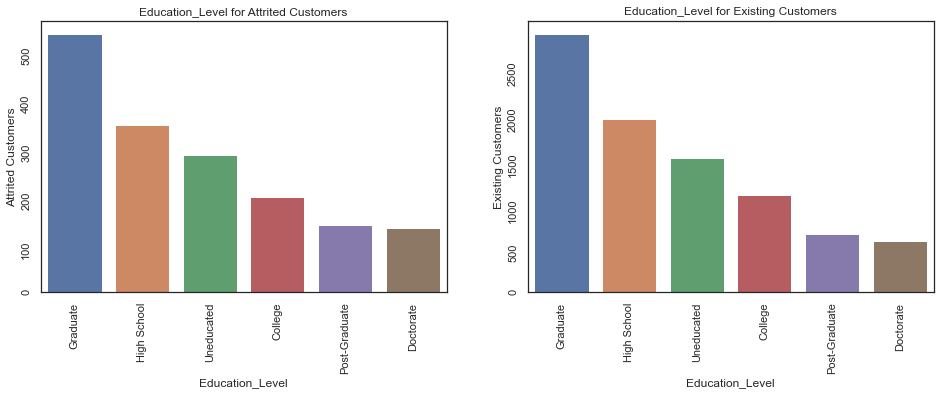

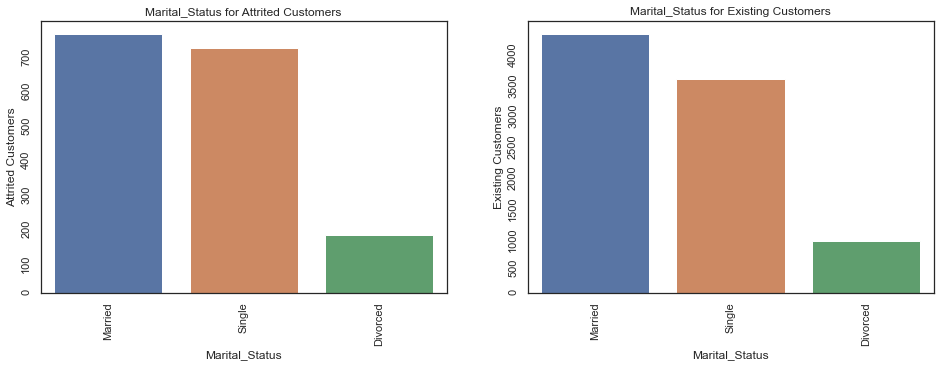

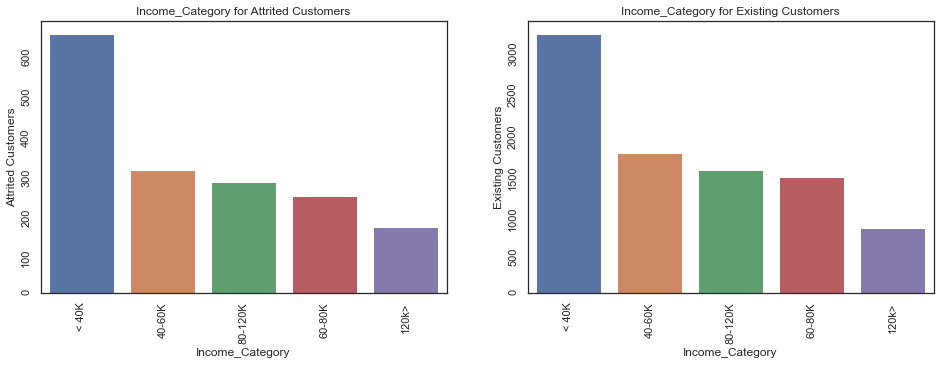

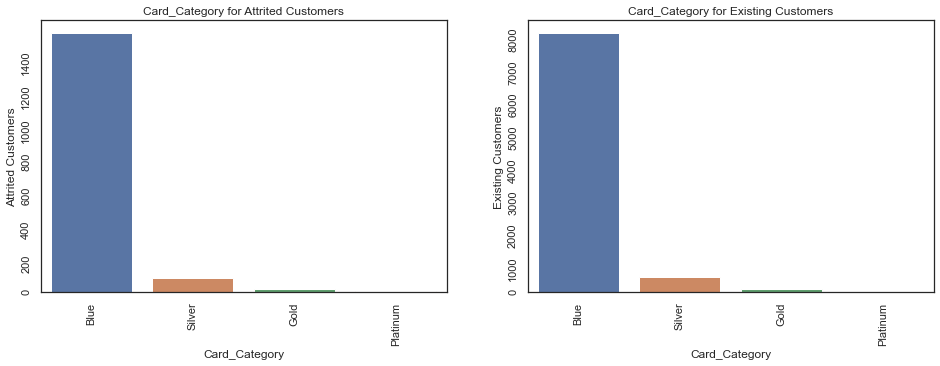

In [255]:
#For loop for graphing all the categortical columns
for col in df.columns:
    if df[col].dtype == 'object':
        Categortical_graphs(col)

In [256]:
#Mapping all the categorical columns for modeling
df.Gender = df.Gender.map({'M':0,'F':1})

df.Education_Level = df.Education_Level.map({'High School':2, 'Graduate':4, 'Uneducated':1,'College':3,
       'Post-Graduate':5, 'Doctorate':6})

df.Marital_Status = df.Marital_Status.map({'Married':2, 'Single':1,'Divorced':3})

df.Income_Category = df.Income_Category.map({'60-80K':3, '< 40K':1, '80-120K':4, '40-60K':2,'120k>':5})

df.Card_Category = df.Card_Category.map({'Blue':0, 'Gold':2, 'Silver':1, 'Platinum':3})

All the data has now been changed to numerical data, the data modelling can being.

Lets see if the dataset for the target is imbalanced. If so I may have to oversample or undersample the data, if I need to, I will check which method will be better for finding bank churners.

In [257]:
#Checking too see how imbalanced the dataset is
df.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

As seen above, the target is imbalance. So i will be testing to see if undersampling or oversampling is better.

# Undersampling Method

In [259]:
#Created the undersampling method by randomly choosing the same amount of 0 values as 1 
df1 = df[df.Attrition_Flag == 1]
df0 = df[df.Attrition_Flag == 0].sample(n=len(df1),random_state = 27)
dfn = pd.concat([df1,df0],axis=0)

In [260]:
#Import libraries for modeling
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree 
from sklearn import svm 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [261]:
#Setting X and y variables
X = dfn.drop(columns=['Attrition_Flag'])
y = dfn.Attrition_Flag

Now I will be using Pipeline and GridSearch to find which model performs the best.

In [262]:
#Spliting the data into train and test
X_train_us,X_test_us,y_train_us,y_test_us = train_test_split(X,y,test_size = 0.3,random_state=27)

In [267]:
%%time
#Created a pipeline to find the best model

estimators = [('normalise', StandardScaler()),
              ('model', svm.SVC())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [svm.SVC()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__tol': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'model': [linear_model.LogisticRegression()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'model__tol': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'model':[neighbors.KNeighborsClassifier()],
             'normalise':[StandardScaler(), MinMaxScaler()],
             'model__n_neighbors':[1,11,21,31,41,51,]},
            {'model':[tree.DecisionTreeClassifier()],
             'normalise':[StandardScaler(),MinMaxScaler()],
             'model__max_depth':[1,11,21,31,41,51],
             'model__min_samples_leaf':[1,2,3]}
]

grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=-1)
fittedgrid = grid.fit(X_train_us, y_train_us)

Wall time: 44.8 s


In [268]:
#Found the best model for the undersampling method
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=41, min_samples_leaf=3))])

The best estimator was found to be DecisionTreeClassifier with a max_depth value of 41,min sample leaf = 3

In [271]:
#Fitting the best undersampling model
scaler = StandardScaler()
scaler.fit(X_train_us)
X_train_uS = scaler.transform(X_train_us)
X_test_uS = scaler.transform(X_test_us)
tree_US = tree.DecisionTreeClassifier(max_depth=41,min_samples_leaf=3)
tree_US.fit(X_train_uS,y_train_us)
print(f'The Train score was : {tree_US.score(X_train_uS,y_train_us)}')

The Train score was : 0.9762845849802372


In [272]:
#Undersampling predictions
y_pred_us = tree_US.predict(X_test_uS)

In [273]:
#Created a confusion matrix to illistrate how well the model preformed
pd.DataFrame(confusion_matrix(y_test_us,y_pred_us),index=['True Exisiting Customer','True Attrited Customer'],columns=['Predicted Existing Customer','Predicted Attrited Customer'])

,Predicted Existing Customer,Predicted Attrited Customer
True Exisiting Customer,437,42
True Attrited Customer,42,456


In [274]:
print('Tree Model Classification Report:')
print('')
print(classification_report(y_test_us,y_pred_us))

Tree Model Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       479
           1       0.92      0.92      0.92       498

    accuracy                           0.91       977
   macro avg       0.91      0.91      0.91       977
weighted avg       0.91      0.91      0.91       977



With under sampling the model can predict with an accuacy score of about 92% of the target. This tells us the model can predict up too 91% accuracy and 92% precision whether a customer is likely to churn or not. 

# Oversampling Method

For the oversample method I will be using the SMOTE package since it will make for the target variables.

In [275]:
#Seperating the data into X and y variables
X = df.drop(columns=['Attrition_Flag'])
y = df.Attrition_Flag

In [276]:
#Using the SMOTE library to oversample the data by randomly creating data 
sm = SMOTE(random_state=27)
X,y = sm.fit_resample(X,y)

In [277]:
#Spliting the data into train and test
X_train_os,X_test_os,y_train_os,y_test_os = train_test_split(X,y,test_size=0.3)

In [279]:
%%time
#Again using the same pipeline to find the best model
estimators = [('normalise', StandardScaler()),
              ('model', svm.SVC())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [svm.SVC()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__tol': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'model': [linear_model.LogisticRegression()], 
             'normalise': [StandardScaler(), MinMaxScaler()],
             'model__tol': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'model':[neighbors.KNeighborsClassifier()],
             'normalise':[StandardScaler(), MinMaxScaler()],
             'model__n_neighbors':[1,11,21,31,41,51,]},
            {'model':[tree.DecisionTreeClassifier()],
             'normalise':[StandardScaler(),MinMaxScaler()],
             'model__max_depth':[1,11,21,31,41,51],
             'model__min_samples_leaf':[1,2,3]}
]

grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=-1)
fittedgrid = grid.fit(X_train_os, y_train_os)

Wall time: 20min 31s


In [280]:
#Found the best model
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model', SVC(C=10, gamma=0.1))])

The best estimator was found to be SVM with C = 10, gamma = 0.1 and tol = 0.1

In [282]:
#Fitting the best oversampling model
scaler = StandardScaler()
scaler.fit(X_train_os)
X_train_oS = scaler.transform(X_train_os)
X_test_oS = scaler.transform(X_test_os)
SVM_OS = svm.SVC(C=10,gamma=0.1,tol=0.1)
SVM_OS.fit(X_train_oS,y_train_os)
print(f'The Train score was : {SVM_OS.score(X_train_oS,y_train_os)}')

The Train score was : 0.9978991596638656


In [288]:
#Oversampling predictions
y_pred_os = SVM_OS.predict(X_test_oS)

In [289]:
#Created a confusion matrix to illistrate the model on its performance in classifying between Existing and Attrited customers
pd.DataFrame(confusion_matrix(y_test_os,y_pred_os),index=['True Exisiting Customer','True Attrited Customer'],columns=['Predicted Existing Customer','Predicted Attrited Customer'])

,Predicted Existing Customer,Predicted Attrited Customer
True Exisiting Customer,2395,139
True Attrited Customer,64,2502


In [287]:

print('SVM Model Classification Report:')
print('')
print(classification_report(y_test_os,y_pred_os))

SVM Model Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2534
           1       0.95      0.98      0.96      2566

    accuracy                           0.96      5100
   macro avg       0.96      0.96      0.96      5100
weighted avg       0.96      0.96      0.96      5100



Surprisingly the oversampling method using SMOTE, seemed to find a better model with an even higher accuracy and precision score with them being 96% and 97% respectively 